## Retention Modeling at Scholastic Travel Company (STC)
> *  INDU 6611: Group - 13 


In [188]:
#Libraries
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


from sklearn import preprocessing
import sklearn

# For logistic regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#For Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#For KNN model
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore', category = UserWarning)

## Data Importing

In [189]:
df1=pd.read_excel("C://Users//lenovo//Desktop//INDU6611_Applied indu. system analytics//Project//A.xlsx",sheet_name='Exhibit 1 -- Data')

In [190]:
df1.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [191]:
df1.tail()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2391,Data source: Company data adjusted by author u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Last three raws has no value so removing last three raws.

In [192]:
df1.drop(index=[2389,2390,2391],axis=0,inplace=True)

In [193]:
df1.shape

(2389, 56)

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

Note: Checking the data type and columns

## Part-A

## Data Preprocessing and Cleaning

In [195]:
#Checking null values
print(df1.isnull().sum())

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

Removing the 'special pay' column as there are 1919 NA values

In [196]:
df1.drop(['Special.Pay'],axis=1,inplace=True)


In [197]:
#Shape of data file
print("data (No. of columns,No. of Raws) :" ,df1.shape)

data (No. of columns,No. of Raws) : (2389, 55)


In [198]:
#filling null values based on data types by mode
df1['From.Grade'].fillna(int(df1['From.Grade'].mode()),inplace=True)
df1['To.Grade'].fillna(int(df1['To.Grade'].mode()),inplace=True)
df1['CRM.Segment'].fillna(int(df1['CRM.Segment'].mode()),inplace=True)
df1['MDR.Low.Grade'].fillna(int(df1['MDR.Low.Grade'].mode()),inplace=True)
df1['MDR.High.Grade'].fillna(int(df1['MDR.High.Grade'].mode()),inplace=True)

In [199]:
#filling null values based on data types by mean
df1['Total.School.Enrollment'].fillna(int(df1['Total.School.Enrollment'].mean()),inplace=True)
df1['DifferenceTraveltoFirstMeeting'].fillna(int(df1['DifferenceTraveltoFirstMeeting'].mean()),inplace=True)
df1['DifferenceTraveltoLastMeeting'].fillna(int(df1['DifferenceTraveltoLastMeeting'].mean()),inplace=True)
df1['FPP.to.School.enrollment'].fillna(int(df1['FPP.to.School.enrollment'].mean()),inplace=True)

In [200]:
#Taking difference of latest RPL and initial system date from departure date to get time difference
df1['Difference Latest RPL'] = (df1['Departure.Date']-df1['Latest.RPL'])/np.timedelta64(1, 'D')
df1['Difference Latest RPL'].fillna(int(df1['Difference Latest RPL'].mean()),inplace=True)

In [201]:
df1['Difference Initial System Date'] = (df1['Departure.Date']-df1['Initial.System.Date'])/np.timedelta64(1, 'D')
df1['Difference Initial System Date'].fillna(int(df1['Difference Initial System Date'].mean()),inplace=True)

In [202]:
df1['Difference Deposit Date'] = (df1['Departure.Date']-df1['Deposit.Date'])/np.timedelta64(1, 'D')

In [203]:
df1['Income.Level'].unique()

array(['Q', 'A', 'O', nan, 'C', 'I', 'G', 'K', 'L', 'P5', 'N', 'H', 'E',
       'M', 'P', 'P1', 'J', 'P3', 'Z', 'B', 'F', 'D', 'P4'], dtype=object)

In [204]:
#assign each cose of income level with numeric data 
df1['Income.Level'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','Z','P1','P2','P3','P4','P5'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,13,13,13,13,13,13],inplace=True)
df1['Income.Level'].fillna(int(df1['Income.Level'].median()),inplace=True)

In [205]:
df1['SchoolSizeIndicator'].unique()

array(['L', nan, 'M-L', 'S', 'S-M'], dtype=object)

In [206]:
#Assign school size indicators with numeric value
df1['SchoolSizeIndicator'].replace(['S','S-M','M-L','L'],[1,2,3,4],inplace=True)
df1['SchoolSizeIndicator'].fillna(int(df1['SchoolSizeIndicator'].median()),inplace=True)

In [207]:
df1['Travel.Type'].unique()

array(['A', 'B', 'T', 'N'], dtype=object)

In [208]:
#Assign travel type to the numeric code: 
#'Air':1 ; 'Train': 2 ; 'Bus' : 2, 'N' : 1

df1['Travel.Type'].replace(['A','B','T','N'],[1,3,2,1],inplace=True)

In [209]:
#Converting month columns from categorical to numerical data types.
df1['DepartureMonth'].replace(['June','May','April','March','February','January'],[6,5,4,3,2,1],inplace=True)

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2389 non-null   float64       
 3   To.Grade                        2389 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   int64         
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Tuit

## Filling Undefined categorical data into median category

In [211]:
print(df1['SchoolGradeTypeLow'].unique())
print(df1['SchoolGradeTypeHigh'].unique())

['Elementary' 'Middle' 'High' 'Undefined']
['Elementary' 'Middle' 'High' 'Undefined']


In [212]:
#Replacing 'Undefined' value as 'Middle'
df1['SchoolGradeTypeLow'].replace(['Undefined'],['Middle'],inplace=True)
df1['SchoolGradeTypeHigh'].replace(['Undefined'],['Middle'],inplace=True)

In [213]:
print(df1['GroupGradeTypeLow'].unique())
print(df1['GroupGradeTypeHigh'].unique())

['K' 'Middle' 'Undefined' 'High' 'PK' 'Elementary']
['Elementary' 'Middle' 'Undefined' 'High']


In [214]:
df1['GroupGradeTypeLow'].replace(['Undefined'],['Middle'],inplace=True)
df1['GroupGradeTypeHigh'].replace(['Undefined'],['Middle'],inplace=True)

## Encoding by Ordinal encoder

## Converting Categorical data into numeric type

In [215]:
ordinal_encoding_features = ['School.Type','SPR.Product.Type','SPR.New.Existing','SchoolGradeTypeLow','SchoolGradeTypeHigh','GroupGradeTypeLow','GroupGradeTypeHigh','Region','MajorProgramCode']
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
df1[ordinal_encoding_features] = ordinal_encoder.fit_transform(df1[ordinal_encoding_features])

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2389 non-null   float64       
 3   To.Grade                        2389 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   int64         
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Tuit

In [217]:
df1.isnull().sum()

ID                                  0
Program.Code                        0
From.Grade                          0
To.Grade                            0
Group.State                         0
Is.Non.Annual.                      0
Days                                0
Travel.Type                         0
Departure.Date                      0
Return.Date                         0
Deposit.Date                        0
Tuition                             0
FRP.Active                          0
FRP.Cancelled                       0
FRP.Take.up.percent.                0
Early.RPL                         673
Latest.RPL                         19
Cancelled.Pax                       0
Total.Discount.Pax                  0
Initial.System.Date                 8
Poverty.Code                      599
Region                              0
CRM.Segment                         0
School.Type                         0
Parent.Meeting.Flag                 0
MDR.Low.Grade                       0
MDR.High.Gra

In [218]:
print(df1['Group.State'].nunique())
print(df1['Program.Code'].nunique())

54
28


In [219]:
#Dropping all null value columns:
df1.drop(['Early.RPL','Latest.RPL','FirstMeeting','LastMeeting','Poverty.Code','Program.Code','Group.State'],axis=1,inplace=True)

In [220]:
df1.drop(['Initial.System.Date','Departure.Date','Return.Date'],axis=1,inplace=True)

In [221]:
df1.drop(['MDR.Low.Grade','GroupGradeType','Deposit.Date'],axis=1,inplace=True)

In [222]:
df1.drop(['SchoolGradeType'],axis=1,inplace=True)

In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   object 
 1   From.Grade                      2389 non-null   float64
 2   To.Grade                        2389 non-null   float64
 3   Is.Non.Annual.                  2389 non-null   float64
 4   Days                            2389 non-null   float64
 5   Travel.Type                     2389 non-null   int64  
 6   Tuition                         2389 non-null   float64
 7   FRP.Active                      2389 non-null   float64
 8   FRP.Cancelled                   2389 non-null   float64
 9   FRP.Take.up.percent.            2389 non-null   float64
 10  Cancelled.Pax                   2389 non-null   float64
 11  Total.Discount.Pax              2389 non-null   float64
 12  Region                          23

In [224]:
print(df1.shape)

(2389, 44)


In [225]:
df1.corr()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,...,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,Difference Latest RPL,Difference Initial System Date,Difference Deposit Date
From.Grade,1.000000,0.773636,-0.110848,0.379421,0.058237,0.290513,0.088542,0.072532,0.116067,0.061153,...,-0.024638,0.156292,-0.063256,-0.119360,0.149032,0.137584,0.076981,0.013597,0.042690,0.000660
To.Grade,0.773636,1.000000,0.089975,0.410927,-0.021375,0.388165,-0.059041,0.028277,0.146189,0.047310,...,0.129546,-0.313084,-0.104249,-0.238214,0.013794,0.061349,-0.194107,0.086948,0.050666,0.043945
Is.Non.Annual.,-0.110848,0.089975,1.000000,0.019720,-0.069058,0.056052,-0.033359,-0.009289,0.061712,-0.020190,...,-0.015095,-0.352164,0.075641,0.020026,-0.060039,-0.170910,-0.390633,0.091058,0.212748,0.059349
Days,0.379421,0.410927,0.019720,1.000000,-0.126198,0.772086,-0.037300,0.058620,0.069282,0.052793,...,0.158590,-0.117656,-0.106090,-0.173382,-0.001338,0.068393,-0.049402,0.095862,0.158797,0.104473
Travel.Type,0.058237,-0.021375,-0.069058,-0.126198,1.000000,-0.589679,0.231072,0.046672,-0.192257,0.089031,...,-0.090084,0.078243,0.234133,0.159178,0.320891,0.001083,0.074275,-0.088305,-0.159488,-0.086500
Tuition,0.290513,0.388165,0.056052,0.772086,-0.589679,1.000000,-0.225533,-0.007369,0.175085,-0.026192,...,0.198895,-0.179277,-0.266718,-0.294471,-0.218439,0.081983,-0.119015,0.123434,0.191635,0.113786
FRP.Active,0.088542,-0.059041,-0.033359,-0.037300,0.231072,-0.225533,1.000000,0.463491,0.269307,0.383178,...,-0.141236,0.213394,0.386898,0.261698,0.698390,0.144701,0.250478,-0.084442,0.091240,-0.054787
FRP.Cancelled,0.072532,0.028277,-0.009289,0.058620,0.046672,-0.007369,0.463491,1.000000,0.180026,0.850347,...,-0.076617,0.059500,0.093288,0.045080,0.323035,0.178182,0.072659,0.019420,0.109173,0.012705
FRP.Take.up.percent.,0.116067,0.146189,0.061712,0.069282,-0.192257,0.175085,0.269307,0.180026,1.000000,0.054446,...,0.044445,-0.063694,-0.126241,-0.113037,-0.095357,0.060427,-0.016665,0.027308,0.118886,0.051820
Cancelled.Pax,0.061153,0.047310,-0.020190,0.052793,0.089031,-0.026192,0.383178,0.850347,0.054446,1.000000,...,-0.058365,0.021533,0.096799,0.029998,0.349456,0.186292,0.048998,0.036722,0.070803,0.034932


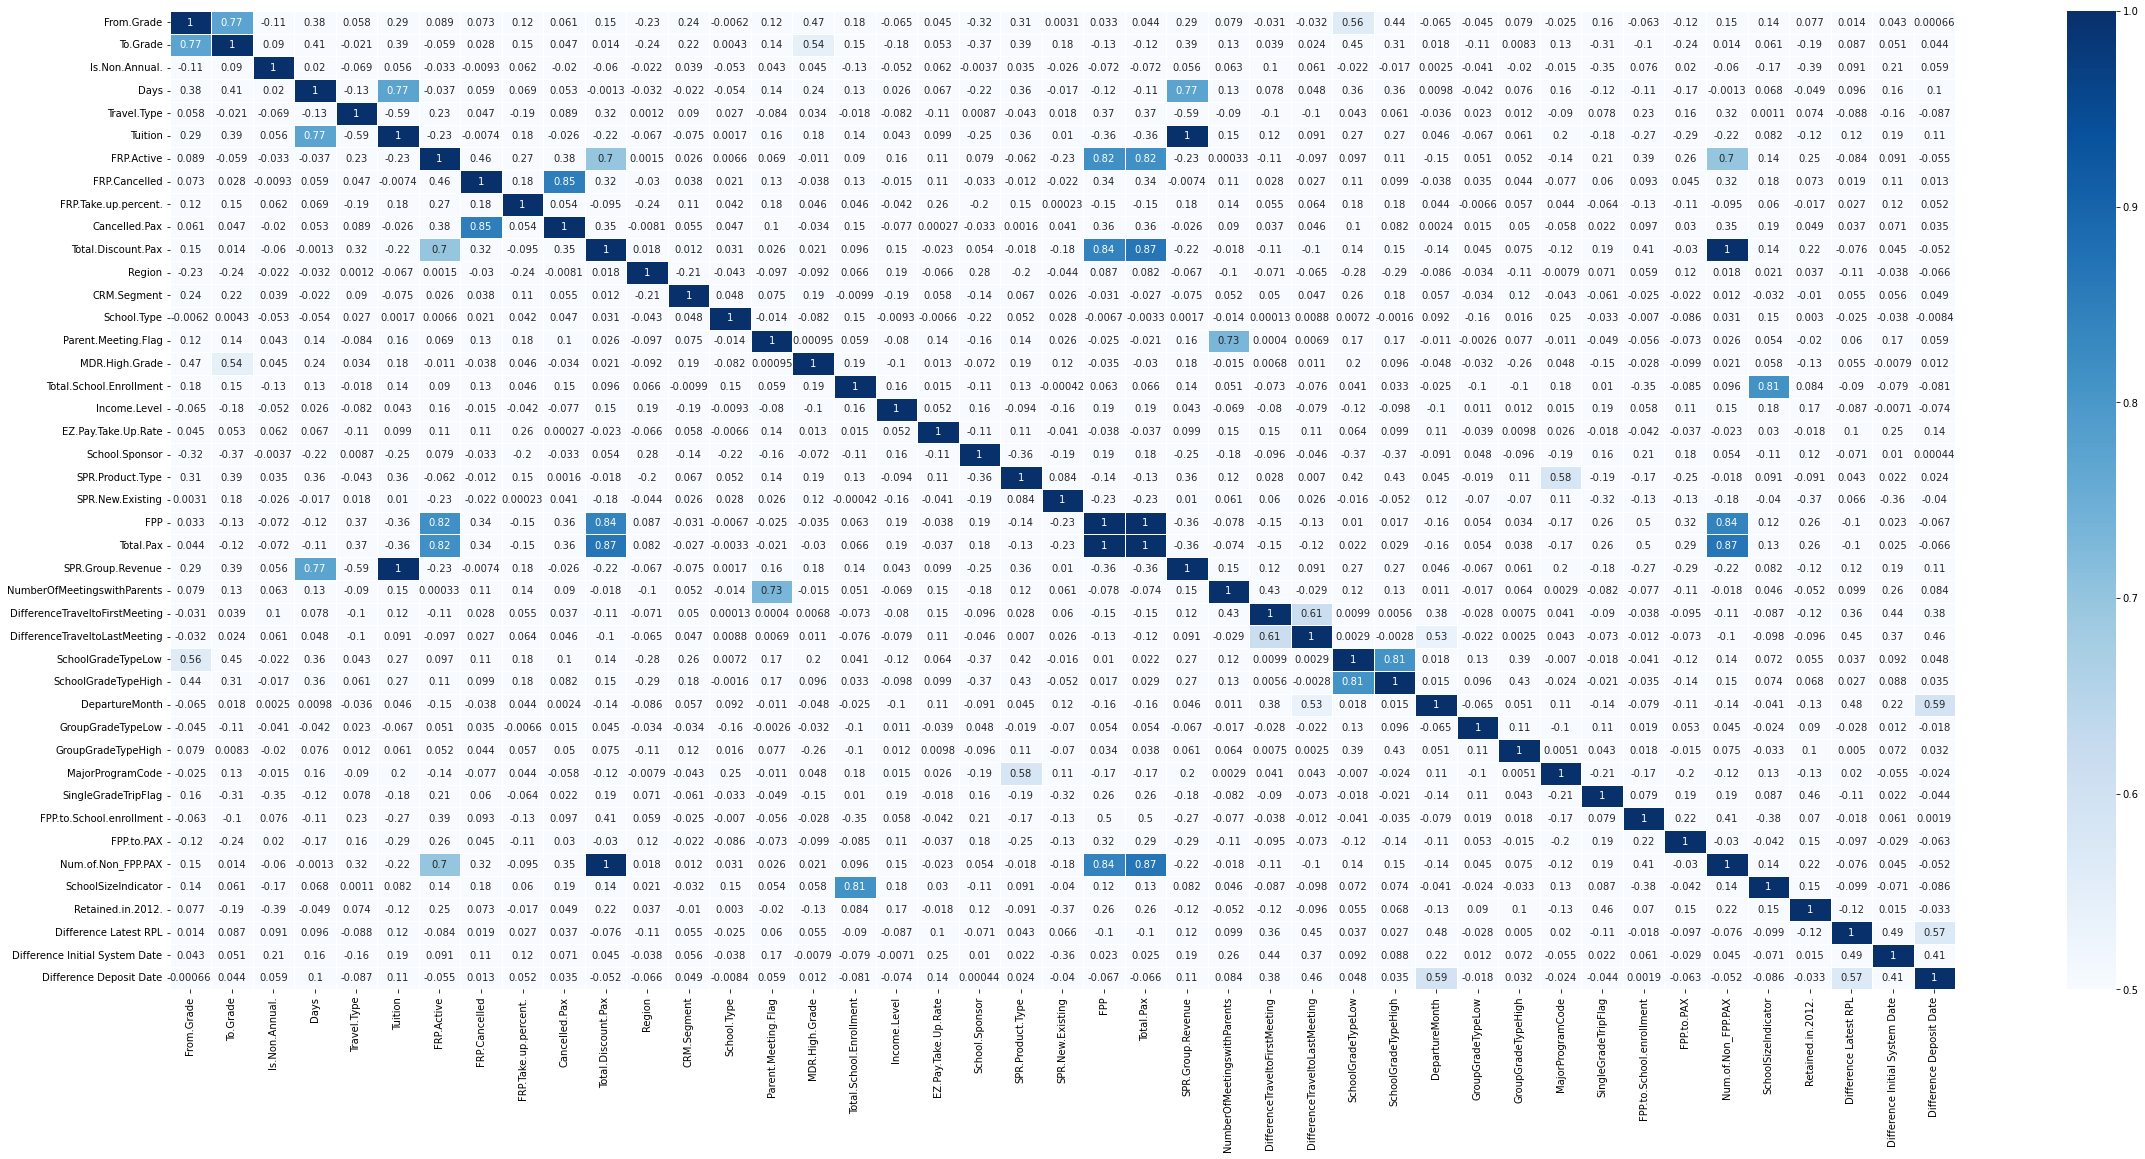

In [226]:
#Creating Correlation Matrix from data
corrMatrix = df1.corr()
plt.figure(figsize = (40,18))
sns.heatmap(corrMatrix, annot=True,linewidths=.5,cmap="Blues",vmin= 0.5)
plt.show()

## Split data into Train (70%) and Test (30%)

In [227]:
data=df1.copy()

Note: Usingscaler method  to normalised the data in the range from 0.0 to 1.0 to avoid error of 'No. of iteration limit exceed'

In [228]:
#Splitting Train and Test Data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_scaler = min_max_scaler.fit_transform(data)
data_scaler = pd.DataFrame(data_scaler,columns= data.columns)

Y =  data_scaler[['Retained.in.2012.']]
data_scaler.drop(['Retained.in.2012.'],axis=1, inplace = True)

#Splitting Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(data_scaler, Y, test_size = 0.3, train_size = 0.7,random_state= 1)

print(data_scaler)

            ID  From.Grade  To.Grade  Is.Non.Annual.      Days  Travel.Type  \
0     0.000000    0.111111  0.111111             0.0  0.000000          0.0   
1     0.000419    0.555556  0.555556             0.0  0.545455          0.0   
2     0.000838    0.555556  0.555556             0.0  0.181818          0.0   
3     0.001256    0.666667  1.000000             1.0  0.181818          1.0   
4     0.001675    0.333333  0.555556             0.0  0.454545          0.5   
...        ...         ...       ...             ...       ...          ...   
2384  0.998325    0.444444  0.555556             0.0  0.363636          0.0   
2385  0.998744    0.555556  0.555556             0.0  0.363636          0.0   
2386  0.999162    0.777778  1.000000             0.0  0.454545          0.0   
2387  0.999581    0.111111  0.111111             0.0  0.000000          0.0   
2388  1.000000    0.555556  0.555556             0.0  0.454545          0.0   

       Tuition  FRP.Active  FRP.Cancelled  FRP.Take

In [229]:

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)

X_train: (1672, 43)
X_test: (717, 43)


In [230]:
X_train

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,...,GroupGradeTypeHigh,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Difference Latest RPL,Difference Initial System Date,Difference Deposit Date
267,0.111809,0.555556,0.666667,0.0,0.181818,0.0,0.298229,0.042802,0.044444,0.917,...,1.0,0.333333,0.0,0.011243,0.807692,0.021277,0.333333,0.199330,0.418079,0.418605
1239,0.518844,0.111111,0.111111,0.0,0.000000,0.0,0.073769,0.023346,0.000000,0.300,...,0.0,0.333333,1.0,0.013009,0.880952,0.021277,0.666667,0.304858,0.396893,0.484268
653,0.273451,0.555556,0.555556,0.0,0.363636,0.0,0.464208,0.175097,0.022222,0.692,...,1.0,0.333333,1.0,0.056548,0.788732,0.127660,0.333333,0.231156,0.463277,0.425445
1685,0.705611,0.555556,0.555556,0.0,0.272727,0.0,0.368600,0.081712,0.222222,0.677,...,1.0,0.333333,1.0,0.022609,0.848485,0.042553,0.666667,0.311558,0.443503,0.506156
2034,0.851759,0.444444,0.666667,1.0,0.363636,0.0,0.447950,0.062257,0.000000,0.667,...,1.0,0.333333,0.0,0.038974,0.722222,0.063830,0.000000,0.356784,0.542373,0.534884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.402010,0.111111,0.111111,0.0,0.000000,0.0,0.076195,0.097276,0.000000,0.385,...,0.0,0.333333,1.0,0.051998,0.925373,0.042553,0.666667,0.261307,0.361582,0.492476
905,0.378978,0.444444,0.555556,1.0,0.272727,1.0,0.206503,0.019455,0.000000,0.500,...,1.0,0.333333,0.0,0.027066,0.772727,0.021277,0.000000,0.256281,0.227401,0.445964
1096,0.458961,0.555556,0.555556,0.0,0.272727,1.0,0.092453,0.070039,0.022222,0.391,...,1.0,0.333333,1.0,0.026150,0.754902,0.106383,1.000000,0.231156,0.206215,0.458276
235,0.098409,0.555556,0.555556,0.0,0.454545,1.0,0.232953,0.210117,0.222222,0.524,...,1.0,0.333333,1.0,0.071481,0.778761,0.212766,0.666667,0.219430,0.442090,0.411765


## Decision Tree classifier

In [231]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7168758716875872


In [232]:
# Accuracy using Decision Tree Classifier based on 'entropy' criterion
dt1_model=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt1_model.fit(X_train,y_train)
predictions=dt1_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7210599721059973


In [233]:
#Decision tree classifier feature importance
dt2_model = tree.DecisionTreeClassifier()
dt2_model.fit(X_train, y_train)
print(dt2_model.feature_importances_)
print(X_train.columns)

print('Tree depth: ', dt2_model.get_depth())
print('Number of leaf nodes: ', dt2_model.get_n_leaves())

[0.0249378  0.01196389 0.00395619 0.08597624 0.01184712 0.00382545
 0.02354333 0.02451459 0.00937312 0.03836086 0.0383197  0.00394463
 0.01831362 0.00845166 0.01179009 0.00168176 0.0024462  0.02741612
 0.01439691 0.01167801 0.00556794 0.00545083 0.05676742 0.03622484
 0.03478166 0.0233491  0.00365318 0.02408417 0.00660476 0.00420441
 0.00168176 0.00697771 0.01062831 0.         0.         0.21393336
 0.04623193 0.02832916 0.00545973 0.00441463 0.02303933 0.04729808
 0.03458035]
Index(['ID', 'From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Travel.Type',
       'Tuition', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Region', 'CRM.Segment',
       'School.Type', 'Parent.Meeting.Flag', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'Differ

In [234]:
#Decision tree classifier using 'gini' criterion
max_depth = 15
criterion = 'gini'
dt_model_gini = tree.DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
dt_model_gini.fit(X_train, y_train) 

y_pred = dt_model_gini.predict(X_test)


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)



              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61       292
         1.0       0.73      0.83      0.77       425

    accuracy                           0.72       717
   macro avg       0.71      0.69      0.69       717
weighted avg       0.71      0.72      0.71       717



Text(0.5, 15.0, 'Predicted Retension label')

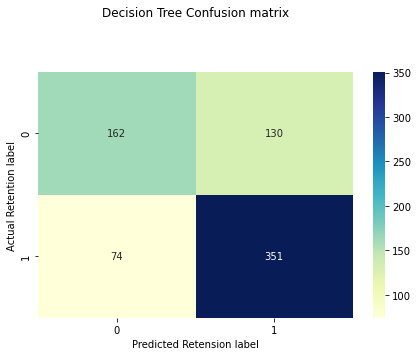

In [235]:
#Plotting the Confusion Matrix
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Decision Tree Confusion matrix', y=1.2)
plt.ylabel('Actual Retention label')
plt.xlabel('Predicted Retension label')

In [236]:
#Decision tree classifier model statistics
print("Decision tree classifier model statistics :\n")
print('Tree depth: ', dt_model_gini.get_depth())
print('Number of leaf nodes: ', dt_model_gini.get_n_leaves())
print('Training set accuracy: ', round(dt_model_gini.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_gini.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100,2))

Decision tree classifier model statistics :

Tree depth:  15
Number of leaf nodes:  220
Training set accuracy:  98.74
Test set accuracy:  71.55
Accuracy: 71.55
Precision: 72.97
Recall: 82.59


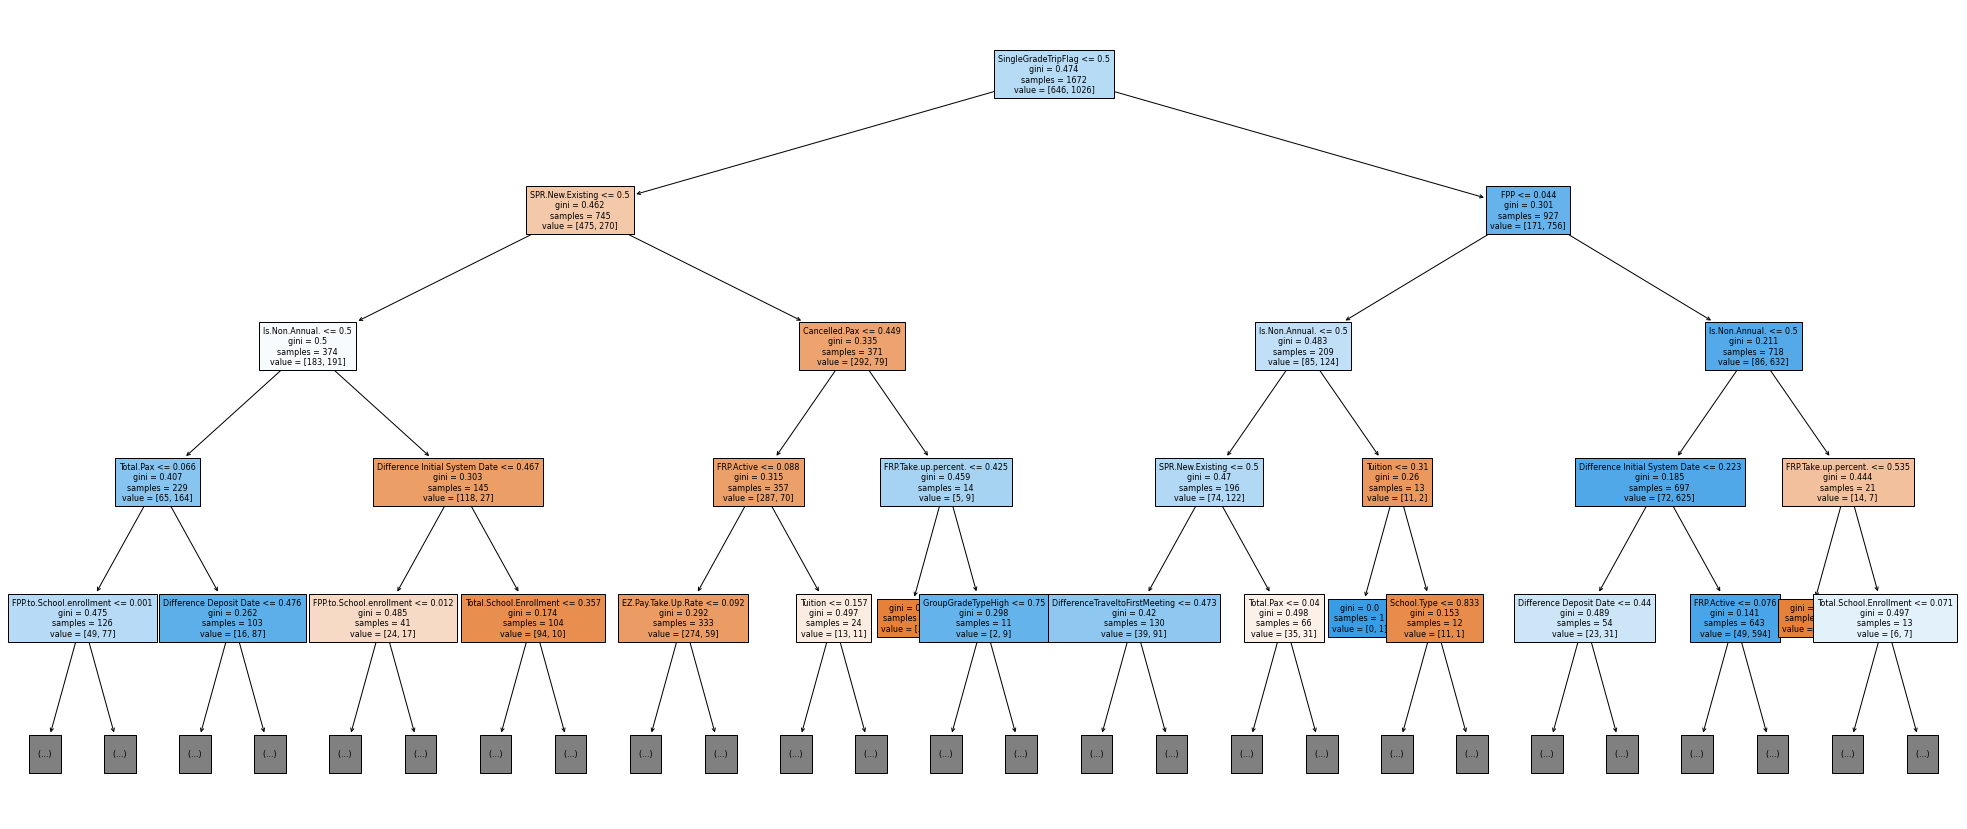

In [237]:
#Decision Tree visualizatoin
plt.figure(figsize=(35,15))
tree_plot = tree.plot_tree(dt_model_gini, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 4)
plt.show()

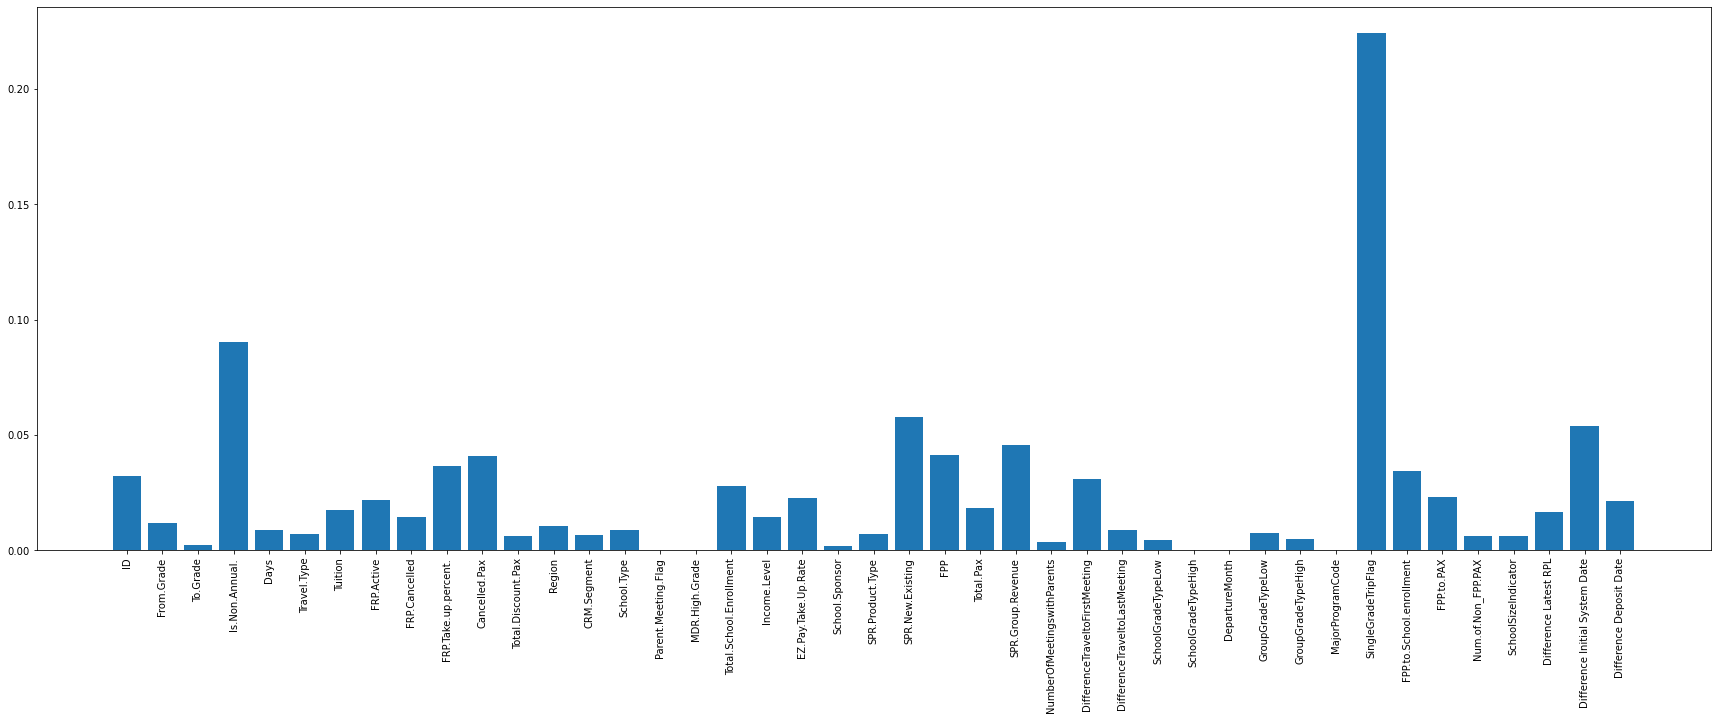

In [238]:
#Decesion tree clssifier feature importance with GINI criteria
plt.figure(figsize= (30, 10))
plt.bar(X_train.columns, dt_model_gini.feature_importances_)
plt.xticks(ticks= range(len(dt_model_gini.feature_importances_)),labels= X_train.columns, rotation= "vertical")
plt.show()

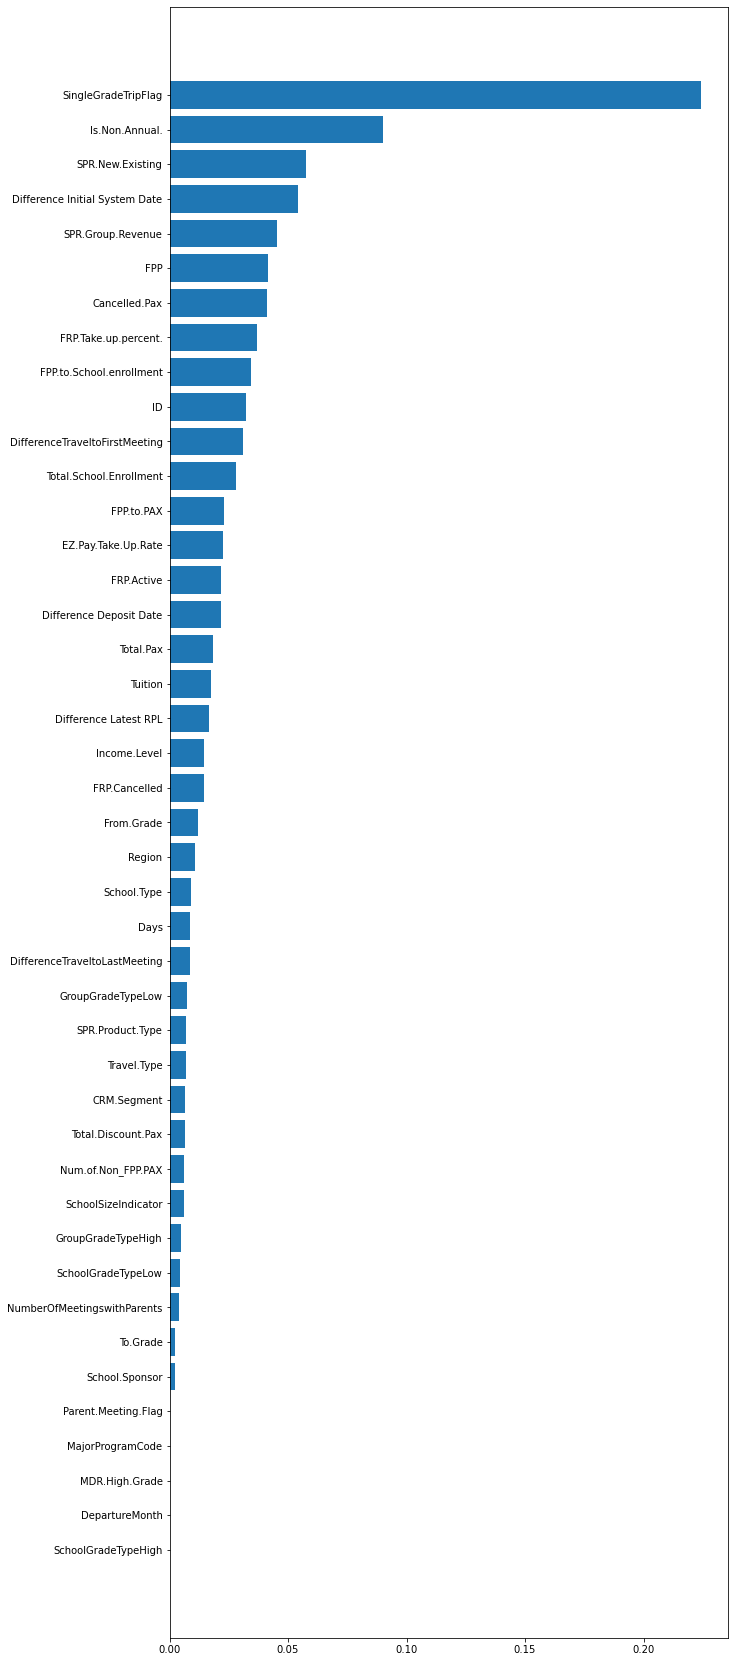

In [239]:
plt.figure(figsize= (10, 30))
dtsortedID = dt_model_gini.feature_importances_.argsort()
plt.barh(X_train.columns[dtsortedID], dt_model_gini.feature_importances_[dtsortedID])
plt.show()

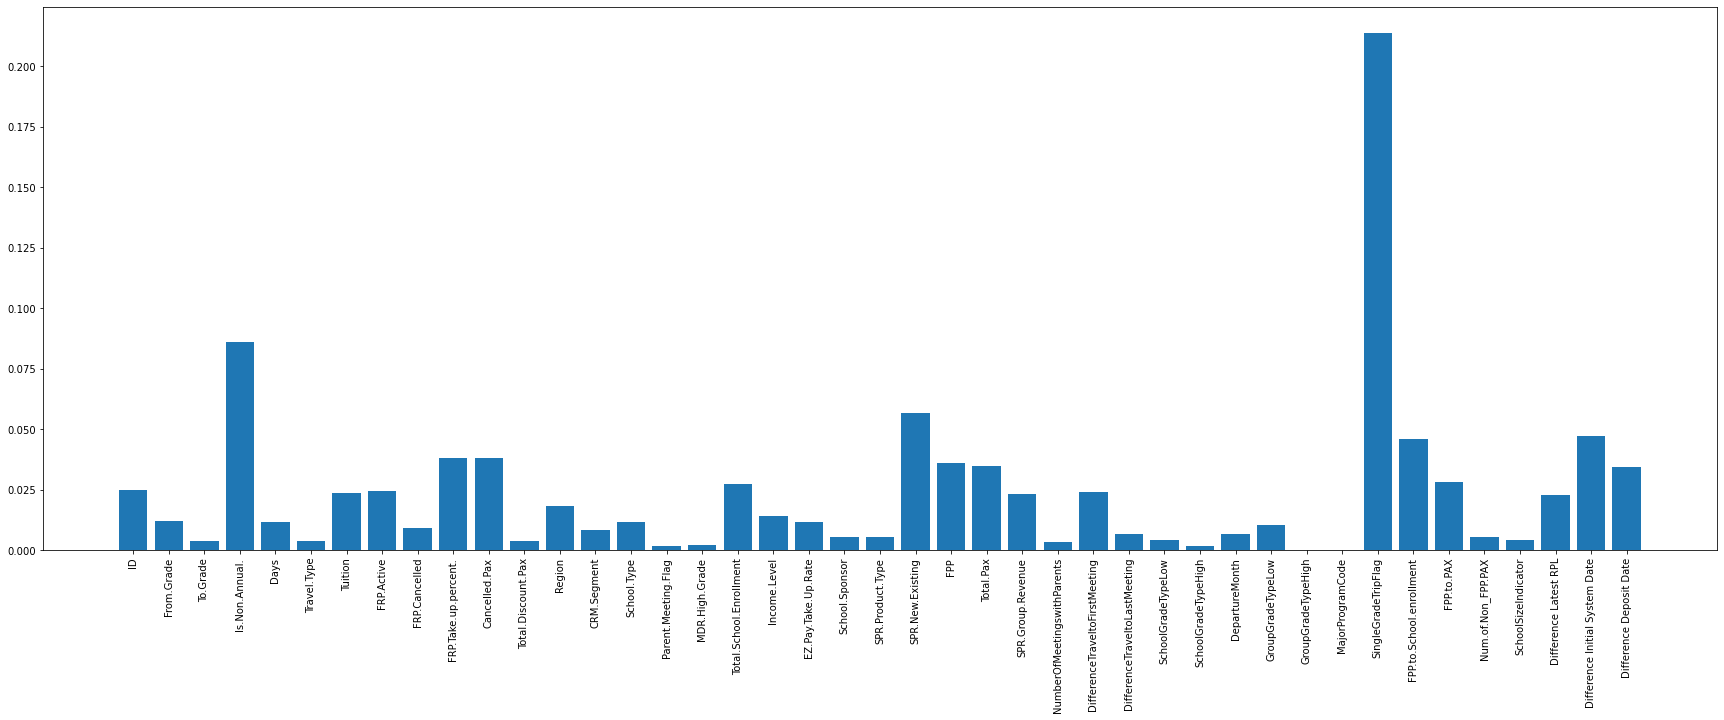

In [240]:
plt.figure(figsize= (30, 10))
plt.bar(X_train.columns, dt2_model.feature_importances_)
plt.xticks(ticks= range(len(dt2_model.feature_importances_)),labels= X_train.columns, rotation= "vertical")
plt.show()

## Random Forest classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 15
criterion = 'gini'
n_estimators = 150
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
dt_model_rf.fit(X_train, y_train)

# Random Forest model Prediction
rf_pred=dt_model_rf.predict(X_test)


cnf_matrix_rf = metrics.confusion_matrix(y_test, rf_pred)
cnf_matrix_rf

#Evaluating the model
print(classification_report(y_test,y_pred))

cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61       292
         1.0       0.73      0.83      0.77       425

    accuracy                           0.72       717
   macro avg       0.71      0.69      0.69       717
weighted avg       0.71      0.72      0.71       717



Text(0.5, 15.0, 'Predicted Retension label')

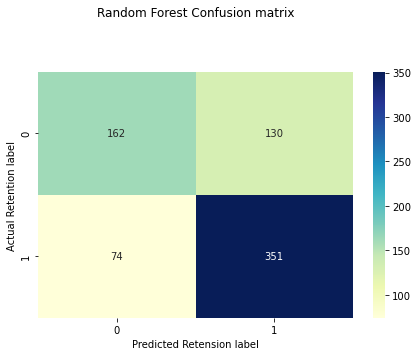

In [242]:
#Plotting Confusion Matrix for Random Forest method
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Random Forest Confusion matrix', y=1.2)
plt.ylabel('Actual Retention label')
plt.xlabel('Predicted Retension label')

In [243]:
#Random Forest classifier model statistics
print("Random Forest classifier model statistics :\n")
print('Training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, rf_pred)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, rf_pred)*100,2))
print("Recall:",round(metrics.recall_score(y_test, rf_pred)*100,2))

Random Forest classifier model statistics :

Training set accuracy:  100.0
Test set accuracy:  78.1
Accuracy: 78.1
Precision: 79.65
Recall: 84.71


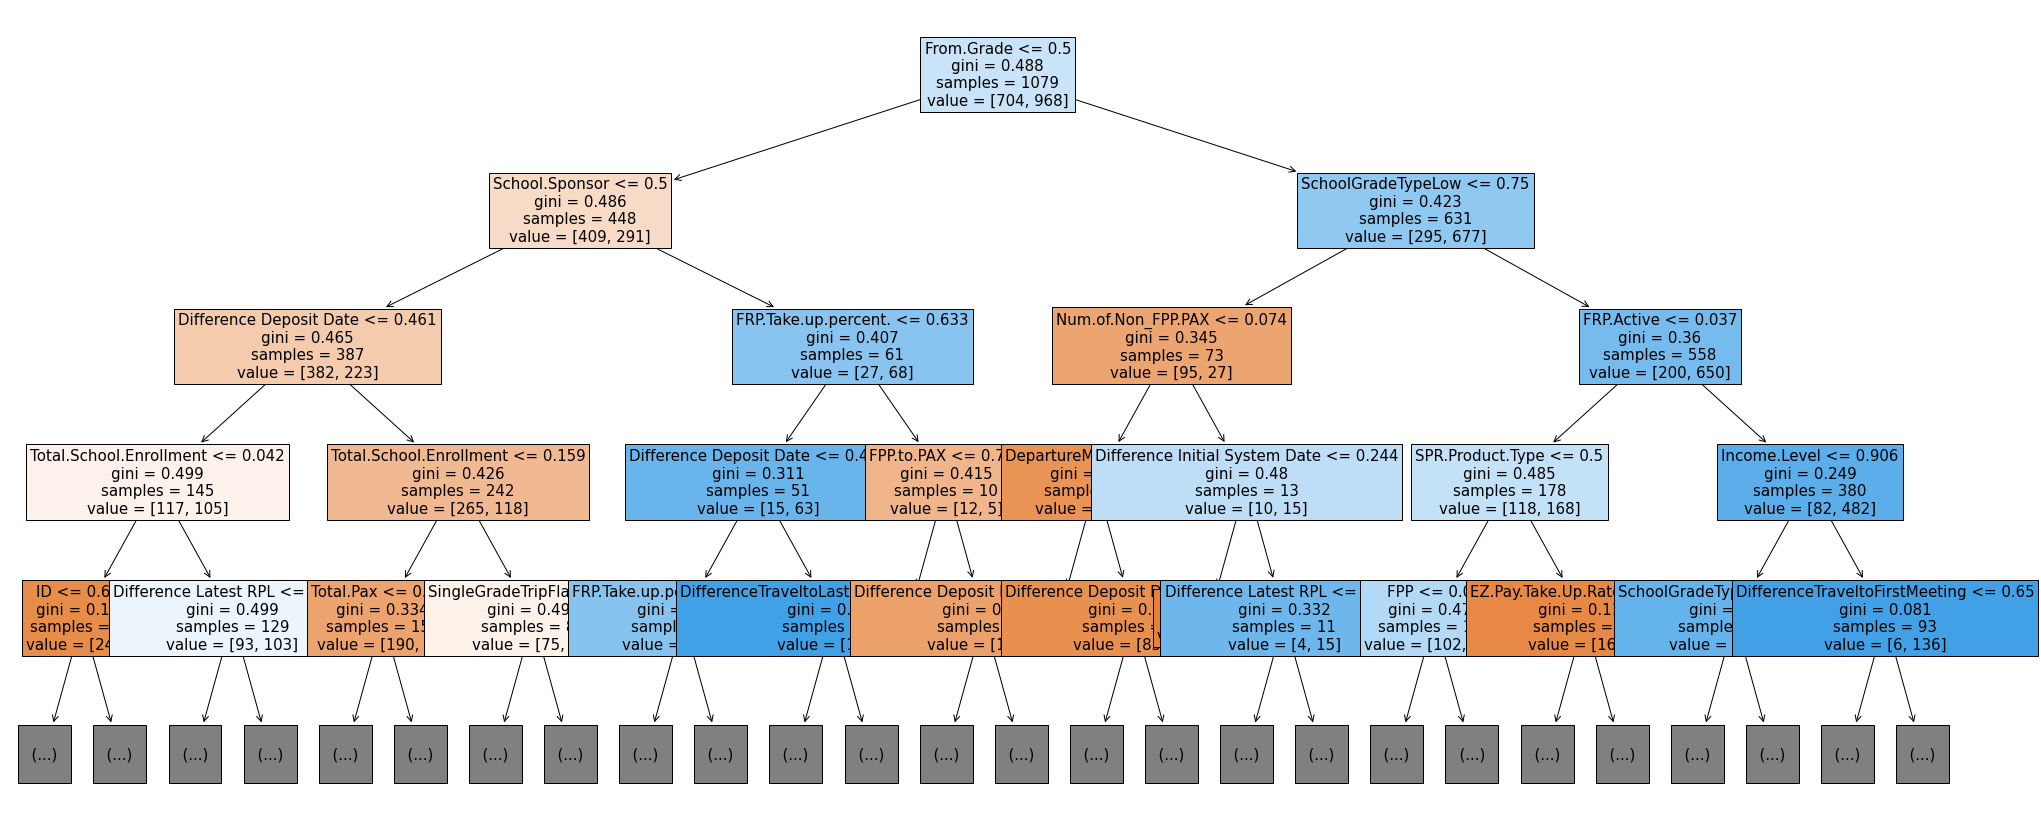

In [244]:
#Tree Visualization for Random forest 

plt.figure(figsize=(35,15))
tree.plot_tree(dt_model_rf[4],fontsize = 15, feature_names = X_train.columns,filled = True, max_depth=4) #Model of 4th estimator
plt.show()

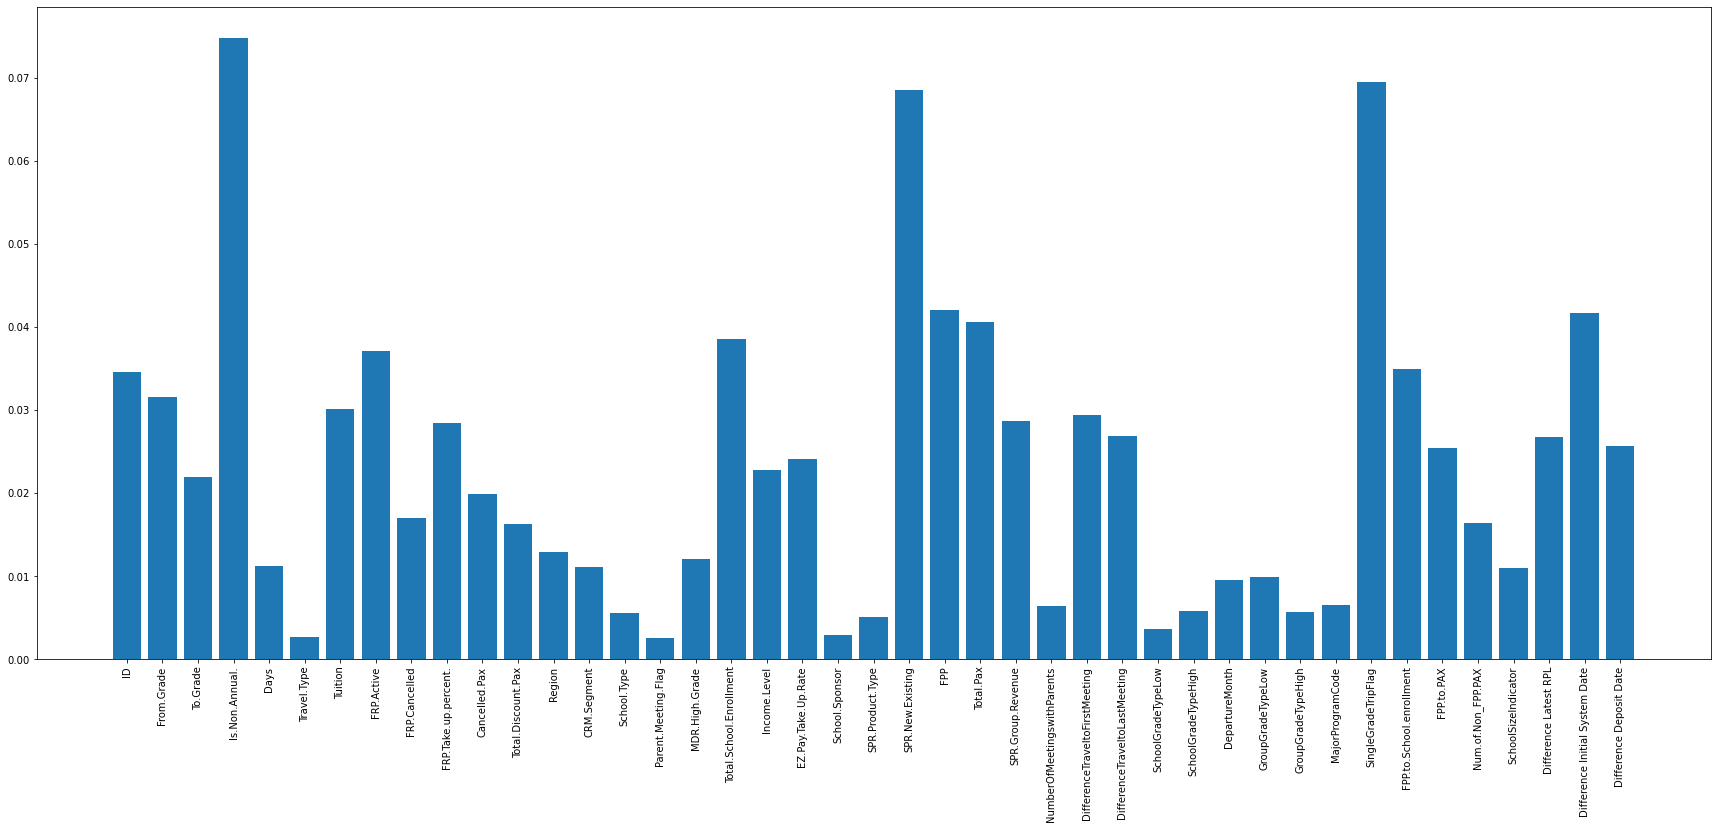

In [245]:
#Random forest feature importance
plt.figure(figsize= (30,12))
plt.bar(X_train.columns, dt_model_rf.feature_importances_)
plt.xticks(ticks= range(len(dt_model_rf.feature_importances_)),labels= X_train.columns, rotation= "vertical")
plt.show()

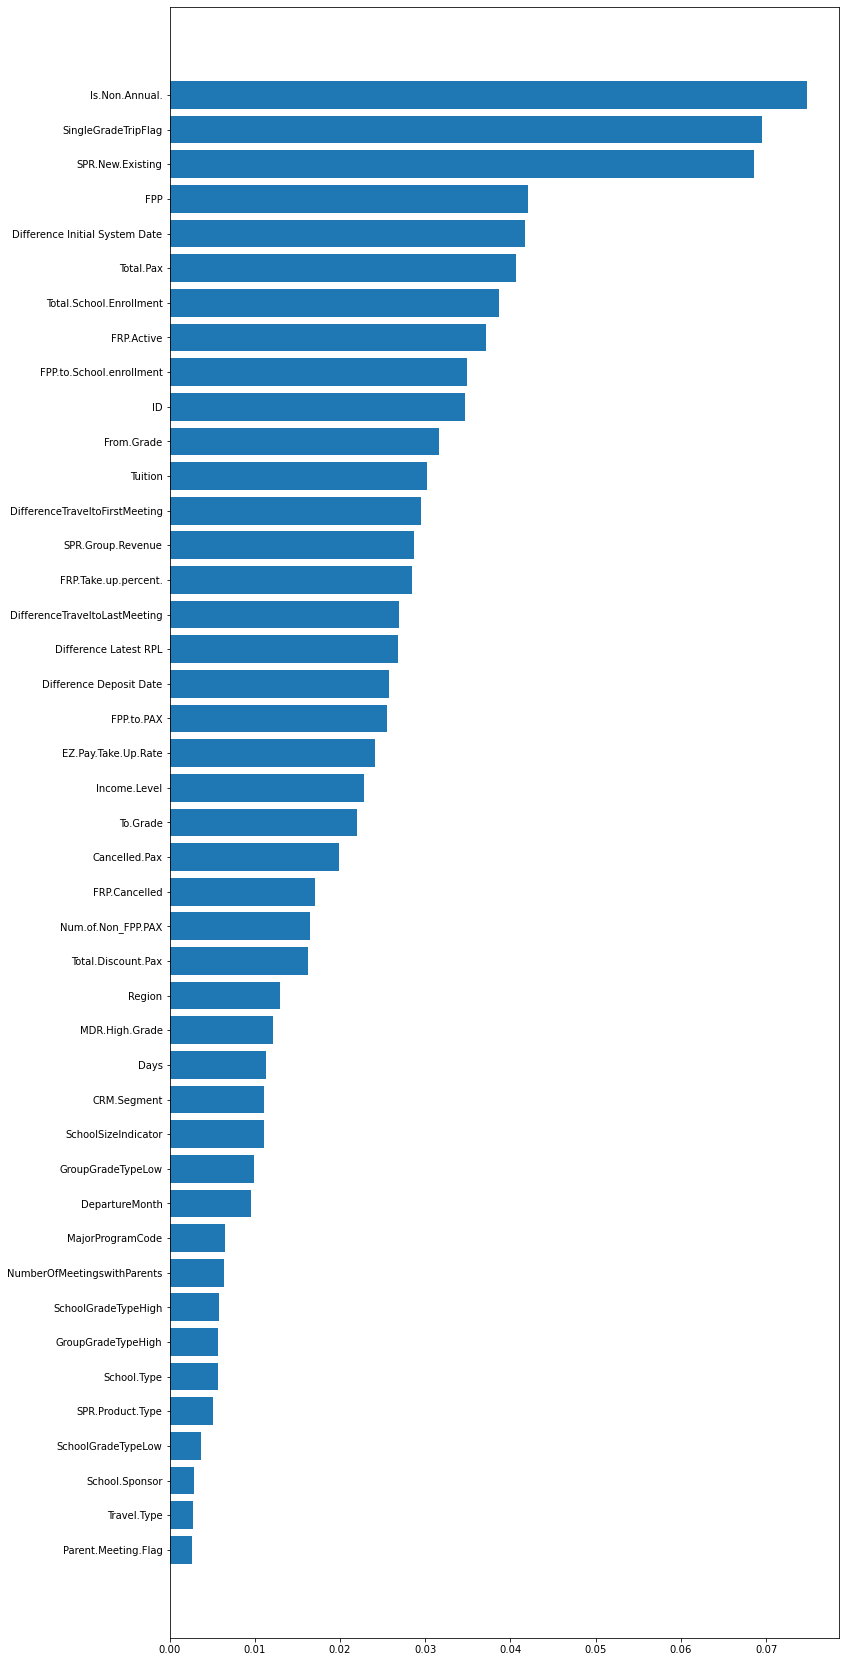

In [246]:
plt.figure(figsize= (12, 30))
rfsortedID = dt_model_rf.feature_importances_.argsort()
plt.barh(X_train.columns[rfsortedID], dt_model_rf.feature_importances_[rfsortedID])
plt.show()

In [247]:
rf_pred

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0.

Percentage of Unlikely  :  67.08507670850767
Percentage of Likely :  32.91492329149233


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


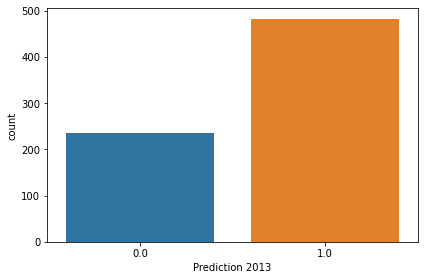

In [248]:
#Prediction with Random Forest  model for the year 2013-2014
rf_pred = X_test.copy()
rf_pred['Prediction 2013'] = y_pred
rf_pred['Prediction 2013'].to_csv("Predictions_2013-2014_RandomForest.csv")
redeption_pred = rf_pred[['Prediction 2013']]
redeption_pred = redeption_pred.groupby('Prediction 2013')['Prediction 2013'].agg(['count'])
labels = ['Unlikely','Highely Likely']
sns.countplot(rf_pred['Prediction 2013'],label="Count")       
plt.tight_layout()
plt.show
Unlikely, Likely = rf_pred['Prediction 2013'].value_counts()
print('Percentage of Unlikely  : ',( Unlikely*100)/(Likely + Unlikely))
print('Percentage of Likely : ', ( Likely*100)/(Likely + Unlikely))

In [249]:
#Calculating MSE to check accuracy of prediction model
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, y_pred))

0.5334030637818674

In [250]:
#Redeption Prediction for year 2013-2014
rf_pred.head()

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,...,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Difference Latest RPL,Difference Initial System Date,Difference Deposit Date,Prediction 2013
1145,0.479481,0.555556,0.555556,0.0,0.181818,0.0,0.190488,0.089494,0.133333,0.397,...,0.333333,1.0,0.039082,0.801587,0.106383,0.666667,0.293132,0.508475,0.469220,1.0
899,0.376466,0.555556,0.555556,0.0,0.454545,0.0,0.441640,0.128405,0.111111,0.402,...,0.000000,1.0,0.036317,0.803371,0.148936,1.000000,0.237856,0.495763,0.447332,1.0
1813,0.759213,0.333333,0.333333,0.0,0.272727,0.0,0.408396,0.019455,0.022222,0.625,...,0.333333,1.0,0.014990,0.722222,0.021277,0.000000,0.313233,0.276836,0.484268,0.0
2104,0.881072,0.666667,1.000000,0.0,0.272727,0.0,0.466149,0.042802,0.066667,0.786,...,0.333333,0.0,0.010381,0.833333,0.021277,0.666667,0.254606,0.225989,0.488372,0.0
1614,0.675879,0.444444,0.555556,1.0,0.363636,0.0,0.478039,0.038911,0.044444,0.556,...,0.333333,0.0,0.019189,0.750000,0.042553,0.333333,0.326633,0.539548,0.493844,0.0


## Logistic Regression

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

#Model Evaluation
print(classification_report(y_test,y_pred))

# import the metrics class
from sklearn import metrics
cnf_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_log_reg


              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       292
         1.0       0.80      0.86      0.83       425

    accuracy                           0.79       717
   macro avg       0.78      0.77      0.77       717
weighted avg       0.78      0.79      0.78       717



array([[199,  93],
       [ 61, 364]], dtype=int64)

Text(0.5, 15.0, 'Predicted Retension label')

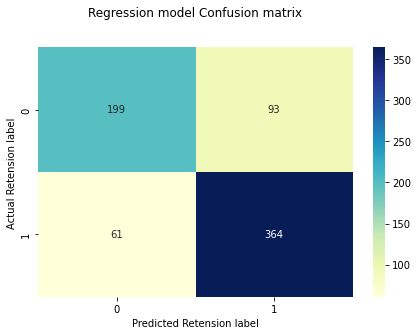

In [252]:
#Plotting Confusion Matrix for Logistic regression model
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log_reg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Regression model Confusion matrix', y=1.1)
plt.ylabel('Actual Retension label')
plt.xlabel('Predicted Retension label')

In [253]:
#Logistic regression model statistics
print("Logistic regression model statistics :\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print('training set accuracy: ', round(log_reg.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(log_reg.score(X_test, y_test)*100, 2))

Logistic regression model statistics :

Accuracy: 0.7852161785216178
Precision: 0.7964989059080962
Recall: 0.8564705882352941
training set accuracy:  81.52
test set accuracy:  78.52


## Neural Networks

In [254]:
#Importing MLPclassifier for neural network from sklearn library 
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

model_nn.fit(X_train, y_train)


#Predicting
y_pred = model_nn.predict(X_test)

#Evaluating
print(classification_report(y_test,y_pred))

cnf_matrix_nn = metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       292
         1.0       0.79      0.84      0.82       425

    accuracy                           0.78       717
   macro avg       0.77      0.76      0.76       717
weighted avg       0.77      0.78      0.77       717



Text(0.5, 257.44, 'Predicted Retention label')

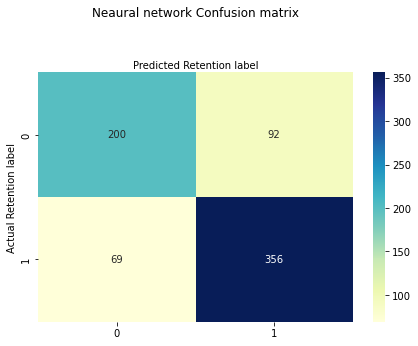

In [255]:
#Plotting Confusion Matrix for Neaural network
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Neaural network Confusion matrix', y=1.2)
plt.ylabel('Actual Retention label')
plt.xlabel('Predicted Retention label')

In [256]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [257]:
#Neural network model statistics
print("Neural network model statistics :\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

##accuracy on the training set
print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))
##accuracy on the test set 
print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Neural network model statistics :

Accuracy: 0.7754532775453278
Precision: 0.7946428571428571
Recall: 0.8376470588235294
training set accuracy:  81.16
test set accuracy:  79.5


## SVM (Support Vector Machine)

## (1) Linear SVM

In [258]:
#Linear SVM
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#Predicting
y_pred = svclassifier.predict(X_test)

#Evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       292
         1.0       0.82      0.80      0.81       425

    accuracy                           0.78       717
   macro avg       0.77      0.78      0.77       717
weighted avg       0.78      0.78      0.78       717



Text(0.5, 15.0, 'Predicted Retention label')

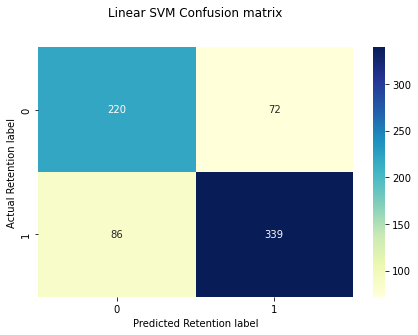

In [259]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

#Plotting Confusion Matrix
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Linear SVM Confusion matrix', y=1.1)
plt.ylabel('Actual Retention label')
plt.xlabel('Predicted Retention label')

In [260]:
#Linear SVM model statistics
print("Linear SVM model statistics :\n")
#Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))

print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Linear SVM model statistics :

Accuracy: 0.7796373779637378
Precision: 0.8248175182481752
Recall: 0.7976470588235294
training set accuracy:  78.59
test set accuracy:  77.96


## (2) Gaussian SVM

In [261]:
#This 'rnf' kernel is default selection which gives best prediction accuracy
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

#Predicting
y_pred = svclassifier.predict(X_test)

#Evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73       292
         1.0       0.79      0.88      0.84       425

    accuracy                           0.79       717
   macro avg       0.80      0.78      0.78       717
weighted avg       0.80      0.79      0.79       717



Text(0.5, 15.0, 'Predicted Retention label')

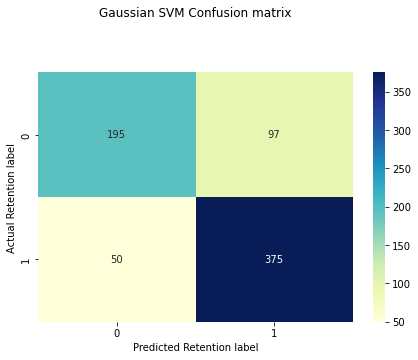

In [262]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

#Plotting Confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Gaussian SVM Confusion matrix', y=1.2)
plt.ylabel('Actual Retention label')
plt.xlabel('Predicted Retention label')

In [263]:
# Gaussian SVM model statistics
print("Gaussian SVM model statistics :\n")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

##accuracy on the training set
print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))
##accuracy on the test set 
print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Gaussian SVM model statistics :

Accuracy: 0.7949790794979079
Precision: 0.7944915254237288
Recall: 0.8823529411764706
training set accuracy:  81.16
test set accuracy:  79.5


Percentage of Unlikely  :  65.82984658298466
Percentage of Likely :  34.17015341701534


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


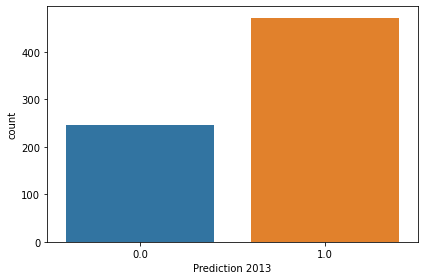

In [264]:

#Prediction with Gaussian SVM model for the year 2013-2014
svmg_pred = X_test.copy()
svmg_pred['Prediction 2013'] = y_pred
svmg_pred['Prediction 2013'].to_csv("Predictions_2013-2014_Gaussian.csv")
redeption_pred = svmg_pred[['Prediction 2013']]
redeption_pred = redeption_pred.groupby('Prediction 2013')['Prediction 2013'].agg(['count'])
labels = ['Unlikely','Highely Likely']
sns.countplot(svmg_pred['Prediction 2013'],label="Count")       
plt.tight_layout()
plt.show
Unlikely, Likely = svmg_pred['Prediction 2013'].value_counts()
print('Percentage of Unlikely  : ',( Unlikely*100)/(Likely + Unlikely))
print('Percentage of Likely : ', ( Likely*100)/(Likely + Unlikely))

In [265]:
#To calculate MSE 
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, y_pred))

0.4527923591472056

## kNN (k-Nearest Neigbours)

In [266]:
from sklearn.model_selection import GridSearchCV 


In [267]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning)

weights_vals = ['uniform', 'distance']
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ParamDictionary_knn = {'n_neighbors': k_vals, 'weights': weights_vals}
from sklearn.model_selection import GridSearchCV 
knn = sklearn.neighbors.KNeighborsClassifier()
gridCVknn = sklearn.model_selection.GridSearchCV(knn, ParamDictionary_knn, return_train_score = True)
gridCVknn_result = gridCVknn.fit(X_train, y_train)

resultsDictionaryknn = {'n_neighbors': gridCVknn_result.cv_results_['param_n_neighbors'], 'weights': gridCVknn_result.cv_results_['param_weights'], 'mean_test_score': gridCVknn_result.cv_results_['mean_test_score'], 'std_test_score': gridCVknn_result.cv_results_['std_test_score'], 'mean_train_score': gridCVknn_result.cv_results_['mean_train_score'], 'rank': gridCVknn_result.cv_results_['rank_test_score']}
resultsknn = pd.DataFrame(resultsDictionaryknn)
display(resultsknn)


,n_neighbors,weights,mean_test_score,std_test_score,mean_train_score,rank
0,1,uniform,0.706944,0.006514,1.000000,17
1,1,distance,0.706944,0.006514,1.000000,17
2,2,uniform,0.694992,0.012299,0.855712,20
3,2,distance,0.706944,0.006514,1.000000,17
4,3,uniform,0.765545,0.007399,0.862440,14
5,3,distance,0.764347,0.006352,1.000000,15
6,4,uniform,0.751790,0.007460,0.836125,16
7,4,distance,0.766748,0.010478,1.000000,13
8,5,uniform,0.784687,0.007846,0.837171,10
9,5,distance,0.787080,0.006947,1.000000,6


In [268]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
knn_results = knn.fit(X_train, y_train)
print('The training accuracy: ', round(knn_results.score(X_train, y_train)*100, 2))
print('The test accuracy: ', round(knn_results.score(X_test, y_test)*100, 2))

The training accuracy:  83.79
The test accuracy:  76.71


In [269]:
print("Accuracy:",round(metrics.accuracy_score(y_test, knn_results.predict(X_test))*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, knn_results.predict(X_test))*100,2))
print("Recall:",round(metrics.recall_score(y_test, knn_results.predict(X_test))*100,2))


Accuracy: 76.71
Precision: 78.04
Recall: 84.47


## Part-B

In [270]:
part_b=pd.read_excel("C://Users//lenovo//Desktop//INDU6611_Applied indu. system analytics//Project//B.xlsx",sheet_name='Exhibit 1 -- Data')

In [271]:
part_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              2390 non-null   object        
 1   NPS 2011        1812 non-null   float64       
 2   NPS 2010        1160 non-null   float64       
 3   NPS 2009        1164 non-null   float64       
 4   NPS 2008        977 non-null    float64       
 5   >= 3 FPP Date   2380 non-null   datetime64[ns]
 6   >= 10 FPP Date  1980 non-null   datetime64[ns]
 7   >= 20 FPP Date  1365 non-null   datetime64[ns]
 8   >= 35 FPP Date  771 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(4), object(1)
memory usage: 168.3+ KB


In [272]:
part_b

,ID,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,4,10.0,NaN,10.0,NaN,2011-01-06,2011-01-06,NaT,NaT
4,5,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
...,...,...,...,...,...,...,...,...,...
2387,2389,10.0,9.0,8.0,NaN,2010-09-26,2010-10-04,2010-10-08,NaT
2388,2388,5.0,NaN,NaN,NaN,2010-09-27,2010-12-17,NaT,NaT
2389,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
2390,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT


In [273]:
print(part_b.isnull().sum())

ID                   2
NPS 2011           580
NPS 2010          1232
NPS 2009          1228
NPS 2008          1415
>= 3 FPP Date       12
>= 10 FPP Date     412
>= 20 FPP Date    1027
>= 35 FPP Date    1621
dtype: int64


In [274]:
d1=pd.read_excel("C://Users//lenovo//Desktop//INDU6611_Applied indu. system analytics//Project//A.xlsx",sheet_name='Exhibit 1 -- Data')

In [275]:
#creating departure dates to substract the date of different group of FPP in part-B 
departure_dates=d1[['ID','Departure.Date']]

In [276]:
departure_dates

,ID,Departure.Date
0,1,2011-01-14
1,2,2011-01-14
2,3,2011-01-15
3,4,2011-01-15
4,5,2011-01-16
...,...,...
2387,2388,2011-06-30
2388,2389,2011-06-30
2389,NaN,NaT
2390,NaN,NaT


In [277]:
departure_dates.drop(index=[2389,2390,2391],axis=0,inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8848\2628765957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departure_dates.drop(index=[2389,2390,2391],axis=0,inplace=True)


In [278]:
departure_dates

,ID,Departure.Date
0,1,2011-01-14
1,2,2011-01-14
2,3,2011-01-15
3,4,2011-01-15
4,5,2011-01-16
...,...,...
2384,2385,2011-06-28
2385,2386,2011-06-29
2386,2387,2011-06-29
2387,2388,2011-06-30


In [279]:
part_b

,ID,NPS 2011,NPS 2010,NPS 2009,NPS 2008,>= 3 FPP Date,>= 10 FPP Date,>= 20 FPP Date,>= 35 FPP Date
0,1,10.0,10.0,10.0,10.0,2010-06-06,2010-06-18,2010-08-17,2010-08-30
1,2,9.0,10.0,10.0,NaN,2009-12-15,2010-01-20,2010-05-31,NaT
2,3,NaN,10.0,10.0,NaN,2010-06-09,2010-06-09,2010-10-26,NaT
3,4,10.0,NaN,10.0,NaN,2011-01-06,2011-01-06,NaT,NaT
4,5,10.0,NaN,10.0,NaN,2010-05-13,2010-05-24,2010-05-27,2010-06-01
...,...,...,...,...,...,...,...,...,...
2387,2389,10.0,9.0,8.0,NaN,2010-09-26,2010-10-04,2010-10-08,NaT
2388,2388,5.0,NaN,NaN,NaN,2010-09-27,2010-12-17,NaT,NaT
2389,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
2390,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT


#Here total no of raws are 2392
> * NPS 2010 , NPS 2009, NPS 2008, >= 20 FPP Date and >= 35 FPP Date columns has around half null values so dropping these columns. 

In [280]:
part_b.drop(['>= 10 FPP Date','>= 20 FPP Date','>= 35 FPP Date','NPS 2009', 'NPS 2010', 'NPS 2008'],axis=1,inplace=True)

In [281]:
part_b

,ID,NPS 2011,>= 3 FPP Date
0,1,10.0,2010-06-06
1,2,9.0,2009-12-15
2,3,NaN,2010-06-09
3,4,10.0,2011-01-06
4,5,10.0,2010-05-13
...,...,...,...
2387,2389,10.0,2010-09-26
2388,2388,5.0,2010-09-27
2389,NaN,NaN,NaT
2390,NaN,NaN,NaT


In [282]:
part_b.drop(index=[2389,2390,2391],axis=0,inplace=True)

In [283]:
part_b

,ID,NPS 2011,>= 3 FPP Date
0,1,10.0,2010-06-06
1,2,9.0,2009-12-15
2,3,NaN,2010-06-09
3,4,10.0,2011-01-06
4,5,10.0,2010-05-13
...,...,...,...
2384,2385,9.0,2010-12-05
2385,2386,10.0,2010-06-20
2386,2387,10.0,2011-03-14
2387,2389,10.0,2010-09-26


In [284]:
data_part_b=pd.merge(part_b,departure_dates,on='ID',how='outer')


In [285]:
data_part_b

,ID,NPS 2011,>= 3 FPP Date,Departure.Date
0,1,10.0,2010-06-06,2011-01-14
1,2,9.0,2009-12-15,2011-01-14
2,3,NaN,2010-06-09,2011-01-15
3,4,10.0,2011-01-06,2011-01-15
4,5,10.0,2010-05-13,2011-01-16
...,...,...,...,...
2384,2385,9.0,2010-12-05,2011-06-28
2385,2386,10.0,2010-06-20,2011-06-29
2386,2387,10.0,2011-03-14,2011-06-29
2387,2389,10.0,2010-09-26,2011-06-30


In [286]:
df1

,ID,From.Grade,To.Grade,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,...,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.,Difference Latest RPL,Difference Initial System Date,Difference Deposit Date
0,1,4.0,4.0,0.0,1.0,1,424.0,25.0,3.0,0.424,...,1.0,1.0,0.063646,0.936508,4.0,4.0,1.0,155.0,294.0,137.0
1,2,8.0,8.0,0.0,7.0,1,2350.0,9.0,9.0,0.409,...,1.0,1.0,0.025882,0.880000,3.0,4.0,1.0,157.0,469.0,425.0
2,3,8.0,8.0,0.0,3.0,1,1181.0,17.0,6.0,0.708,...,1.0,1.0,0.025131,0.888889,3.0,4.0,1.0,152.0,352.0,92.0
3,4,9.0,12.0,1.0,3.0,3,376.0,0.0,0.0,0.000,...,1.0,0.0,0.000000,1.000000,0.0,3.0,0.0,260.0,88.0,8.0
4,5,6.0,8.0,0.0,6.0,2,865.0,40.0,8.0,0.494,...,1.0,0.0,0.112500,0.910112,8.0,3.0,0.0,157.0,299.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,7.0,8.0,0.0,5.0,1,1892.0,18.0,4.0,0.514,...,1.0,0.0,0.018980,0.921053,3.0,4.0,0.0,236.0,236.0,195.0
2385,2386,8.0,8.0,0.0,5.0,1,1699.0,16.0,4.0,0.800,...,1.0,1.0,0.034783,0.909091,2.0,2.0,1.0,295.0,428.0,257.0
2386,2387,10.0,12.0,0.0,6.0,1,2149.0,0.0,0.0,0.000,...,1.0,0.0,0.000000,0.882353,4.0,3.0,1.0,203.0,203.0,162.0
2387,2388,4.0,4.0,0.0,1.0,1,449.0,3.0,2.0,0.188,...,1.0,1.0,0.000000,0.941176,1.0,3.0,1.0,296.0,299.0,195.0


In [287]:
data_part_b=pd.merge(df1,data_part_b,on='ID',how='outer')

In [288]:
data_part_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   object        
 1   From.Grade                      2389 non-null   float64       
 2   To.Grade                        2389 non-null   float64       
 3   Is.Non.Annual.                  2389 non-null   float64       
 4   Days                            2389 non-null   float64       
 5   Travel.Type                     2389 non-null   int64         
 6   Tuition                         2389 non-null   float64       
 7   FRP.Active                      2389 non-null   float64       
 8   FRP.Cancelled                   2389 non-null   float64       
 9   FRP.Take.up.percent.            2389 non-null   float64       
 10  Cancelled.Pax                   2389 non-null   float64       
 11  Tota

In [289]:
data_part_b['Difference >3 FPP Date'] = (data_part_b['Departure.Date']-data_part_b['>= 3 FPP Date'])/np.timedelta64(1, 'D')
data_part_b['Difference >3 FPP Date'].fillna(int(data_part_b['Difference >3 FPP Date'].mean()),inplace=True)
data_part_b.drop(['Departure.Date','>= 3 FPP Date'],axis=1,inplace=True)
data_part_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389 entries, 0 to 2388
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2389 non-null   object 
 1   From.Grade                      2389 non-null   float64
 2   To.Grade                        2389 non-null   float64
 3   Is.Non.Annual.                  2389 non-null   float64
 4   Days                            2389 non-null   float64
 5   Travel.Type                     2389 non-null   int64  
 6   Tuition                         2389 non-null   float64
 7   FRP.Active                      2389 non-null   float64
 8   FRP.Cancelled                   2389 non-null   float64
 9   FRP.Take.up.percent.            2389 non-null   float64
 10  Cancelled.Pax                   2389 non-null   float64
 11  Total.Discount.Pax              2389 non-null   float64
 12  Region                          23

In [290]:
data_part_b['NPS 2011'].fillna(int(data_part_b['NPS 2011'].median()),inplace=True)

In [291]:
y_b=data_part_b['Retained.in.2012.']
X_b=data_part_b.drop(['ID','Retained.in.2012.'],axis=1)
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(X_b,y_b,test_size=0.3,random_state=30)

In [292]:

print('Before Splitting X:',X_b.shape)
print("After Splitting")
print('X_train:',X_train_b.shape)
print('X_test:',X_test_b.shape)

Before Splitting X: (2389, 44)
After Splitting
X_train: (1672, 44)
X_test: (717, 44)


## Decision Tree classifier for Part-B

In [293]:
#Decision tree classifier using 'gini' criterion
max_depth = 15
criterion = 'gini'
dt_model_gini = tree.DecisionTreeClassifier(max_depth = max_depth, criterion=criterion)
dt_model_gini.fit(X_train, y_train) 

y_pred = dt_model_gini.predict(X_test)


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       292
         1.0       0.74      0.82      0.78       425

    accuracy                           0.72       717
   macro avg       0.71      0.70      0.70       717
weighted avg       0.72      0.72      0.71       717



In [294]:
#Decision tree classifier model statistics for Part-B:
print("Decision tree classifier model statistics for Part-B :\n")
print('Tree depth: ', dt_model_gini.get_depth())
print('Number of leaf nodes: ', dt_model_gini.get_n_leaves())
print('Training set accuracy: ', round(dt_model_gini.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_gini.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100,2))

Decision tree classifier model statistics for Part-B :

Tree depth:  15
Number of leaf nodes:  220
Training set accuracy:  98.74
Test set accuracy:  71.97
Accuracy: 71.97
Precision: 73.73
Recall: 81.88


## Random Forest For part-B

In [295]:
from sklearn.ensemble import RandomForestClassifier
max_depth = 15
criterion = 'gini'
n_estimators = 150
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
dt_model_rf.fit(X_train, y_train)

# Random Forest model Prediction
rf_pred=dt_model_rf.predict(X_test)


cnf_matrix_rf = metrics.confusion_matrix(y_test, rf_pred)
cnf_matrix_rf

#Evaluating the model
print(classification_report(y_test,y_pred))

cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       292
         1.0       0.74      0.82      0.78       425

    accuracy                           0.72       717
   macro avg       0.71      0.70      0.70       717
weighted avg       0.72      0.72      0.71       717



In [296]:
#Random Forest classifier model statistics for Part-B
print("Random Forest classifier model statistics for Part-B:\n")
print('Training set accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('Test set accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

print("Accuracy:",round(metrics.accuracy_score(y_test, rf_pred)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, rf_pred)*100,2))
print("Recall:",round(metrics.recall_score(y_test, rf_pred)*100,2))

Random Forest classifier model statistics for Part-B:

Training set accuracy:  99.88
Test set accuracy:  79.22
Accuracy: 79.22
Precision: 80.13
Recall: 86.35


## Logistic Regression

In [297]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

#Model Evaluation
print(classification_report(y_test,y_pred))

# import the metrics class
from sklearn import metrics
cnf_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_log_reg

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72       292
         1.0       0.80      0.86      0.83       425

    accuracy                           0.79       717
   macro avg       0.78      0.77      0.77       717
weighted avg       0.78      0.79      0.78       717



array([[199,  93],
       [ 61, 364]], dtype=int64)

In [298]:
#Logistic regression model statistics for Part-B
print("Logistic regression model statistics for part-B :\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print('training set accuracy: ', round(log_reg.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(log_reg.score(X_test, y_test)*100, 2))

Logistic regression model statistics for part-B :

Accuracy: 0.7852161785216178
Precision: 0.7964989059080962
Recall: 0.8564705882352941
training set accuracy:  81.52
test set accuracy:  78.52


## Neural Network

In [299]:
#Importing MLPclassifier for neural network from sklearn library 
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

model_nn.fit(X_train, y_train)


#Predicting
y_pred = model_nn.predict(X_test)

#Evaluating
print(classification_report(y_test,y_pred))

cnf_matrix_nn = metrics.confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       292
         1.0       0.79      0.84      0.82       425

    accuracy                           0.78       717
   macro avg       0.77      0.76      0.76       717
weighted avg       0.77      0.78      0.77       717



In [300]:
#Neural network model statistics for Part-B
print("Neural network model statistics for Part-B:\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

##accuracy on the training set
print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))
##accuracy on the test set 
print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Neural network model statistics for Part-B:

Accuracy: 0.7754532775453278
Precision: 0.7946428571428571
Recall: 0.8376470588235294
training set accuracy:  81.16
test set accuracy:  79.5


## SVM for Part-B

## (1) Linear SVM:

In [301]:
#Linear SVM part-B
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#Predicting
y_pred = svclassifier.predict(X_test)

#Evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       292
         1.0       0.82      0.80      0.81       425

    accuracy                           0.78       717
   macro avg       0.77      0.78      0.77       717
weighted avg       0.78      0.78      0.78       717



In [302]:
#Linear SVM model statistics for part-B
print("Linear SVM model statistics for part-B:\n")
#Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))

print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Linear SVM model statistics for part-B:

Accuracy: 0.7796373779637378
Precision: 0.8248175182481752
Recall: 0.7976470588235294
training set accuracy:  78.59
test set accuracy:  77.96


## (2) Gaussian SVM for part-B:

In [303]:
#Gaussian SVM for part-B
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

#Predicting
y_pred = svclassifier.predict(X_test)

#Evaluating
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73       292
         1.0       0.79      0.88      0.84       425

    accuracy                           0.79       717
   macro avg       0.80      0.78      0.78       717
weighted avg       0.80      0.79      0.79       717



In [304]:
# Gaussian SVM model statistics for part-B
print("Gaussian SVM model statistics for part-B :\n")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

##accuracy on the training set
print('training set accuracy: ', round(svclassifier.score(X_train, y_train) * 100, 2))
##accuracy on the test set 
print('test set accuracy: ', round(svclassifier.score(X_test, y_test)*100, 2))

Gaussian SVM model statistics for part-B :

Accuracy: 0.7949790794979079
Precision: 0.7944915254237288
Recall: 0.8823529411764706
training set accuracy:  81.16
test set accuracy:  79.5


## kNN for part-B

In [305]:
#K-nearest neighbour for part-B
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
knn_results = knn.fit(X_train, y_train)
print('The training accuracy: ', round(knn_results.score(X_train, y_train)*100, 2))
print('The test accuracy: ', round(knn_results.score(X_test, y_test)*100, 2))
print("Accuracy:",round(metrics.accuracy_score(y_test, knn_results.predict(X_test))*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, knn_results.predict(X_test))*100,2))
print("Recall:",round(metrics.recall_score(y_test, knn_results.predict(X_test))*100,2))

The training accuracy:  83.79
The test accuracy:  76.71
Accuracy: 76.71
Precision: 78.04
Recall: 84.47


## Thank you